# Purpose:
The purpose of this notebook is to see gradient descent visually by plotting the gradient values at different feature values along with the function's output.

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
import seaborn as sns

In [103]:
# creating x and y values

x = torch.linspace(-3,3,200, requires_grad=True)
y = torch.linspace(-3,3,200, requires_grad=True)

# defining the function with x and y as inputs

def f(x,y):
    z = 3*(1-x)**2 * torch.exp(-x**2 - (y+1)**2) \
    - 10 * (x/5 - x**3 - y**5) * torch.exp(- x**2 - y**2) \
    - 1/3 * torch.exp(-(x+1)**2 - y**2)
    return z

In [105]:
# computing the gradients with PyTorch .backward()

z = f(x,y)

# x.grad.zero_()
# y.grad.zero_()

z.backward(torch.ones_like(x))

x_grads = x.grad
y_grads = y.grad

In [106]:
# detaching the values from the computation graph and
# converting to numpy format for plotting

x_detached = x.detach().numpy()
y_detached = y.detach().numpy()
z_detached = z.detach().numpy()

x_grads_detached = x_grads.detach().numpy()
y_grads_detached = y_grads.detach().numpy()

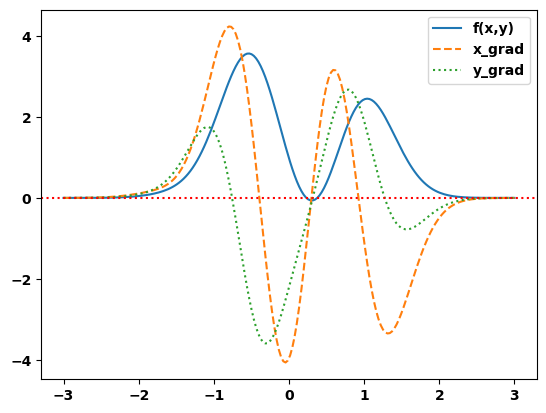

In [174]:
# A 2D plot showing where both x and y gradient cross zero which
# corraberates the local minima

plt.plot(x_detached,z_detached, label='f(x,y)')
plt.plot(x_detached, x_grads_detached, ls='--', label='x_grad')
plt.plot(y_detached, y_grads_detached, ls=':', label='y_grad')
plt.axhline(0, c='r', ls=':')
plt.legend()

In [158]:
# making a dataframe for sorting gradient values

df1 = pd.DataFrame(np.column_stack((x_detached,y_detached,z_detached,np.abs(x_grads_detached),np.abs(y_grads_detached))), columns=['x','y','z','x_grad','y_grad'])
df1_scatter = df1.sort_values(by='x_grad').head(300)
# took the absolute value to find grads near zero

df1_1 = pd.DataFrame(np.column_stack((x_detached,y_detached,z_detached,x_grads_detached,y_grads_detached)), columns=['x','y','z','x_grad','y_grad'])
df1_1_scatter = df1_1.iloc[df1_scatter.index]
# made a new dataframe where the index of the absolute value of the x_grads is used
# so that it can be plotted properly to reflect both positive and negative grads

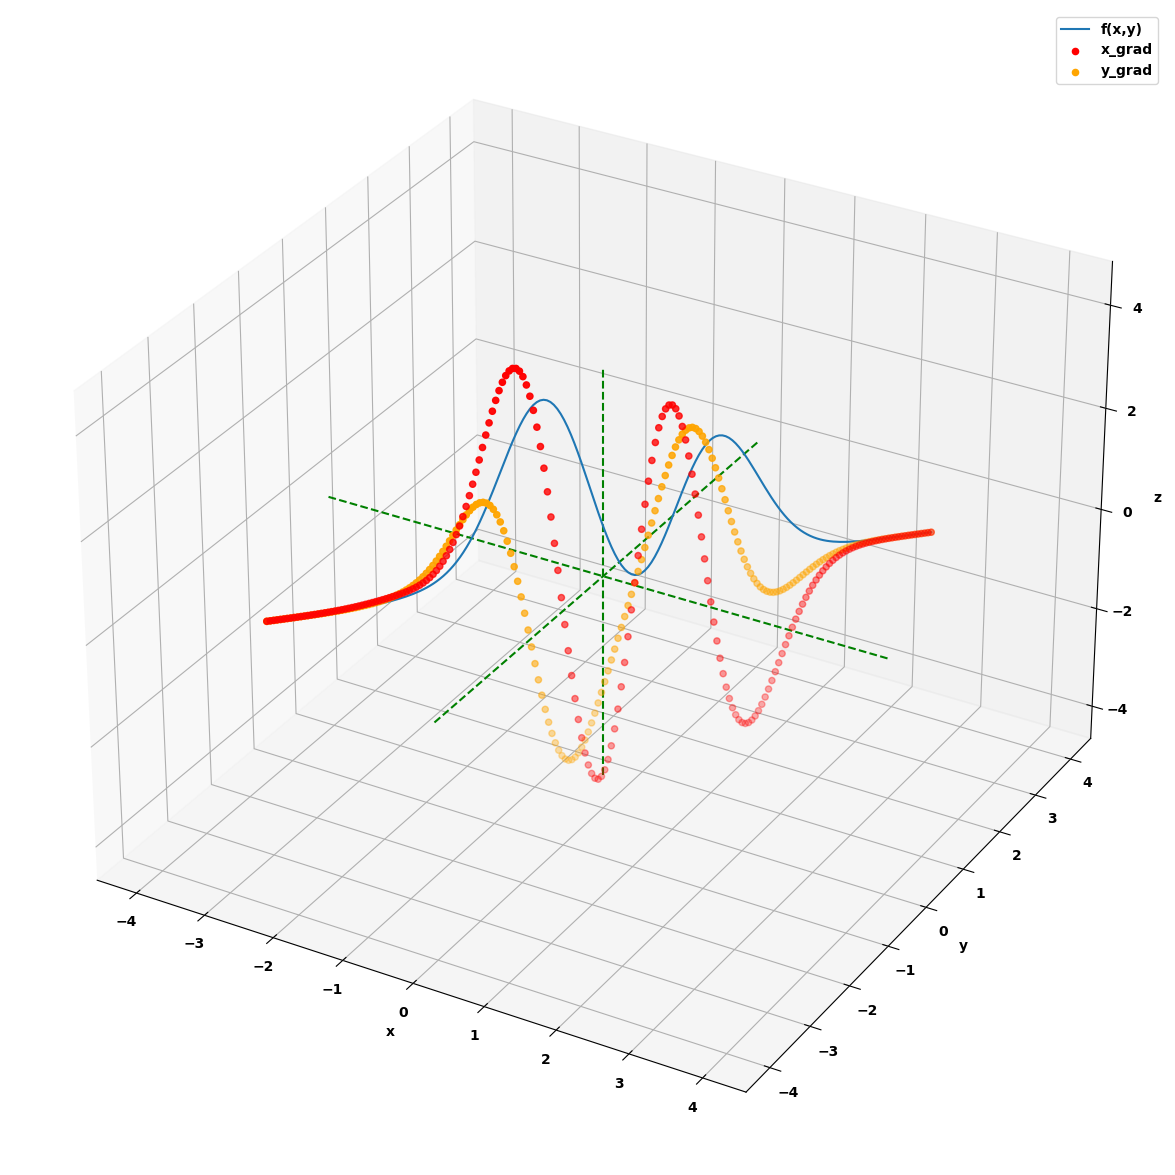

In [172]:
# 3D plot of the function and the x and y gradients

fig = plt.figure(figsize=(15,15))
ax = plt.axes(projection='3d')

ax.plot3D(xs=[0,0,0], ys=[-4,0,4], zs=[0,0,0], ls='--', c='green')
ax.plot3D(ys=[0,0,0], xs=[-4,0,4], zs=[0,0,0], ls='--', c='green')
ax.plot3D(ys=[0,0,0], xs=[0,0,0], zs=[-4,0,4], ls='--', c='green')
ax.plot3D(xs=x_detached, ys= y_detached, zs=z_detached, label='f(x,y)')
# ax.plot3D(xs=x_grads_detached, ys= y_grads_detached, zs=z_detached, ls='-.')
ax.scatter(xs=df1_1_scatter['x'],ys=df1_1_scatter['y'],zs=df1_1_scatter['x_grad'], c='r', label='x_grad')
ax.scatter(xs=df1_1_scatter['x'],ys=df1_1_scatter['y'],zs=df1_1_scatter['y_grad'], c='orange', label='y_grad')

ax.set_ylabel('y')
ax.set_xlabel('x')
ax.set_zlabel('z')

plt.legend()

# New Example

In [128]:
# another example with a single feature, x

# creating x values

x1 = torch.linspace(-2*torch.pi, 2*torch.pi, 401, requires_grad=True)

# defining a function 

def fx(x):
    y = torch.sin(x) * torch.exp(-x**2*0.05)
    return y

In [129]:
# computing the y values of the function

y = fx(x1)

# x1.grad.zero_()

y.backward(torch.ones_like(x1))

x1_grads = x1.grad

x1_grads_detached = x1_grads.detach().numpy()

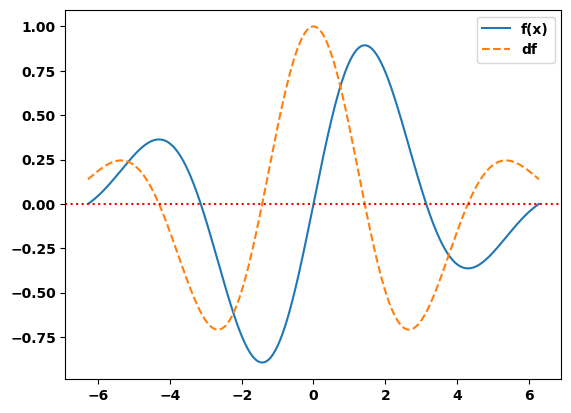

In [139]:
# plotting the function

x1_detached = x1.detach().numpy()
y1_detached = y.detach().numpy()

plt.plot(x1_detached,y1_detached, label='f(x)')
plt.plot(x1_detached, x1_grads_detached, ls='--', label='df')
plt.axhline(0, c='r', ls=':')
plt.legend()

In [141]:
# creating a dataframe to find the smallest gradients of x

fx_grads = pd.DataFrame(np.column_stack((x1_detached,y1_detached,np.abs(x1_grads_detached))), columns=['x','y','grad'])
grad_scatter = fx_grads.sort_values(by='grad').head(10)
grad_scatter

,x,y,grad
63,-4.303982,0.363477,0.000851
337,4.303982,-0.363477,0.000851
62,-4.335398,0.363275,0.013663
338,4.335398,-0.363275,0.013663
245,1.413717,0.893760,0.015205
155,-1.413717,-0.893760,0.015205
64,-4.272566,0.363218,0.015730
336,4.272566,-0.363218,0.015730
246,1.445133,0.893743,0.016252
154,-1.445133,-0.893743,0.016252


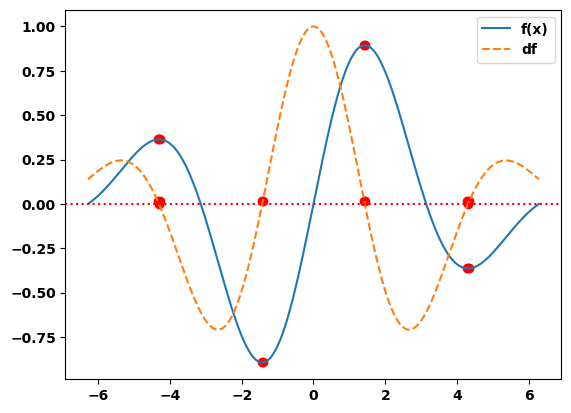

In [144]:
# plotting the function with the x gradients
# and the points on the line plots where the smallest absolute gradient values
# and the y values correspond.
# we can see that when the gradient approaches zero,
# the function's y value slope visually approximates a flat spot

plt.plot(x1_detached,y1_detached, label='f(x)')
plt.plot(x1_detached, x1_grads_detached, ls='--', label='df')
plt.axhline(0, c='r', ls=':')
plt.scatter(x=grad_scatter['x'], y=grad_scatter['y'], c='r')
plt.scatter(x=grad_scatter['x'], y=grad_scatter['grad'], c='r')
plt.legend()